In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [351]:
import tensorflow as tf
model = tf.keras.models.load_model('model.h5')


In [352]:
low_test_dir="RealImages"

In [353]:
# Get the list of all the high light images
try:
    low_image_file = os.listdir(low_test_dir)
    print(low_image_file)  # This will print the list of file names in the directory
except Exception as e:
    print("Error in getting the list of high image files:", e)

['RealImages']


In [354]:
import os
import cv2

# Correctly define your directory path (Use raw string `r""` or double backslashes `\\`)
low_test_dir = r"C:\Users\KIIT\Desktop\MINI PROJECT\Low-Light-Image-Enhancement-main\RealImages\RealImages"

# List of image filenames (Make sure these exist in the directory)
low_image_file = ["low2.jpeg", "low3.jpg", "low4.jpg","low5.jpg","low6.jpg","low7.jpg","low8.jpg","low9.jpg","low10.jpg","low11.jpg","low12.jpg","low13.jpg","low14.jpg","low15.jpeg","low16.jpg","low17.jpg","low18.jpg"]  

low_light_images = []  # Initialize an empty list to store images

for file_name in low_image_file:
    file_path = os.path.join(low_test_dir, file_name)  # Create full file path correctly
    image = cv2.imread(file_path)  # Read the image

    if image is not None:
        low_light_images.append(image)  # Store the image if successfully loaded
    else:
        print(f"Failed to load image from path: {file_path}")  # Print error if failed


In [355]:
new_image_size = (256, 256)

# Define a function to resize the images 
def resize_image(image, new_image_size):
    return cv2.resize(image, new_image_size)

In [356]:
# Resize all the low light images
low_light_images_resized = [resize_image(image, new_image_size) for image in low_light_images]

Text(0.5, 1.0, 'Low Light Image')

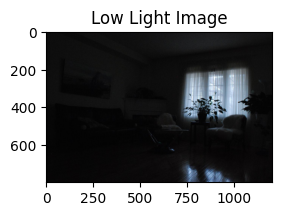

In [357]:
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(low_light_images[2],cv2.COLOR_BGR2RGB))
plt.title("Low Light Image")

In [358]:
def normalize_image(image):
    return image / 255.0

In [359]:
# Normalize all the low light images
low_light_images_normalized = [normalize_image(image) for image in low_light_images_resized]

In [360]:
test_low = np.array(low_light_images_normalized)

In [361]:
print("Shape of the test low light images:", test_low.shape)

Shape of the test low light images: (17, 256, 256, 3)


In [362]:
predictions = model.predict(test_low)
predictions.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


(17, 256, 256, 3)

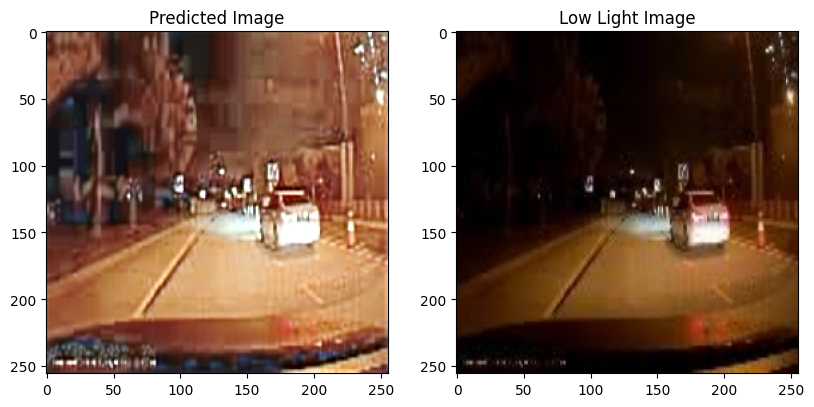

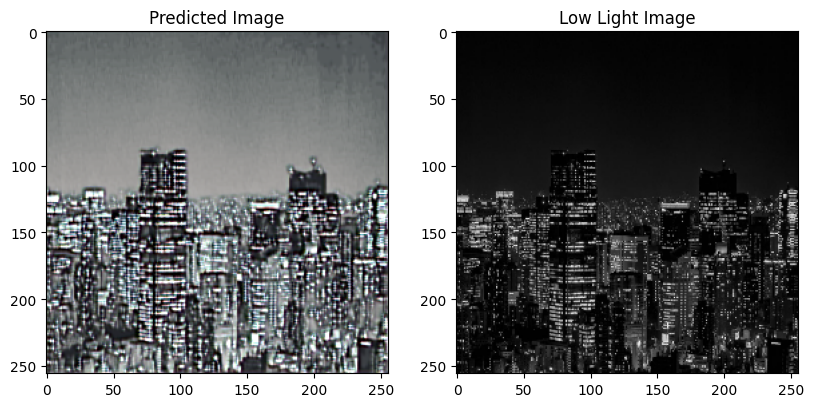

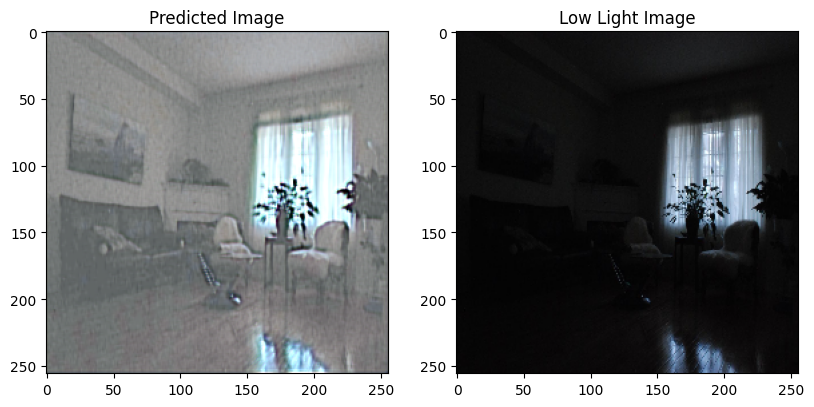

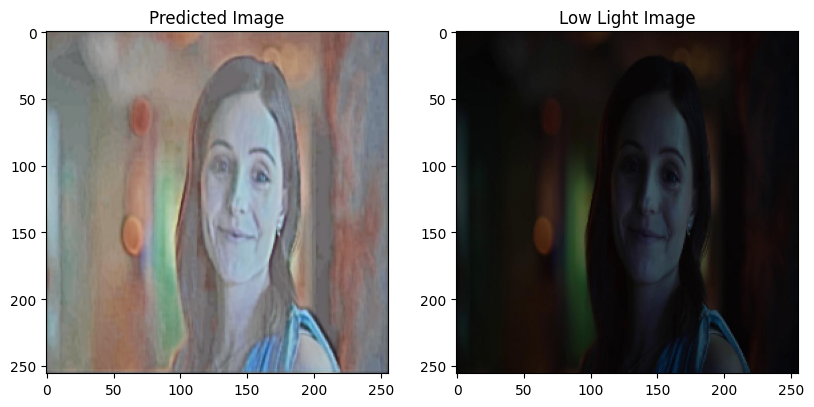

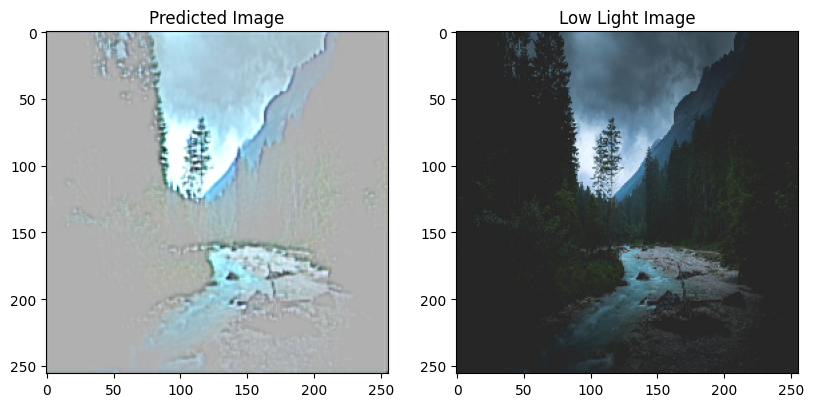

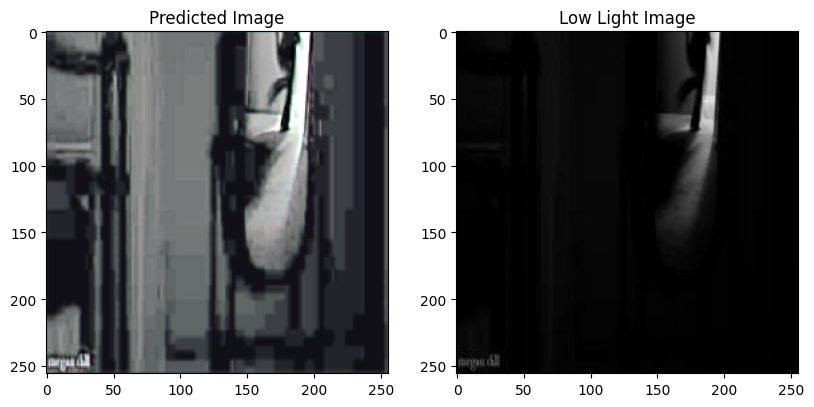

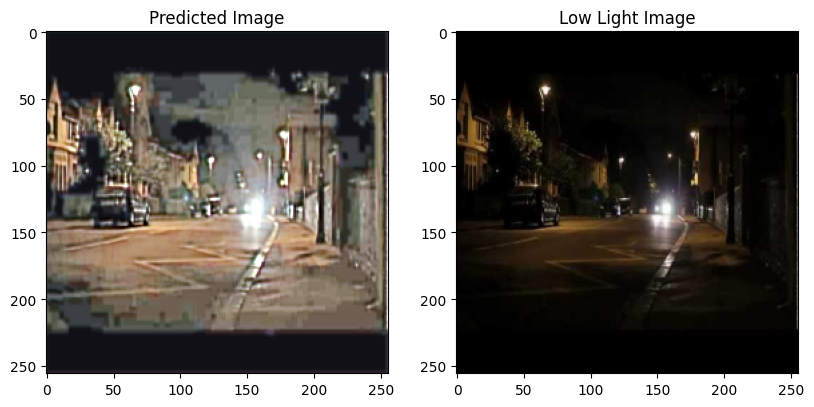

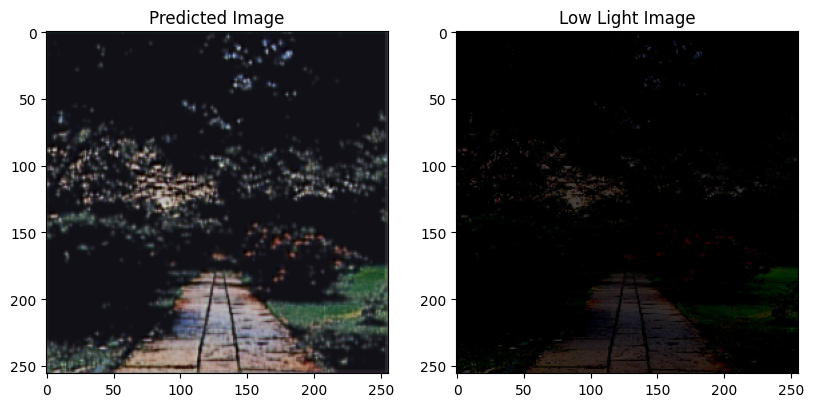

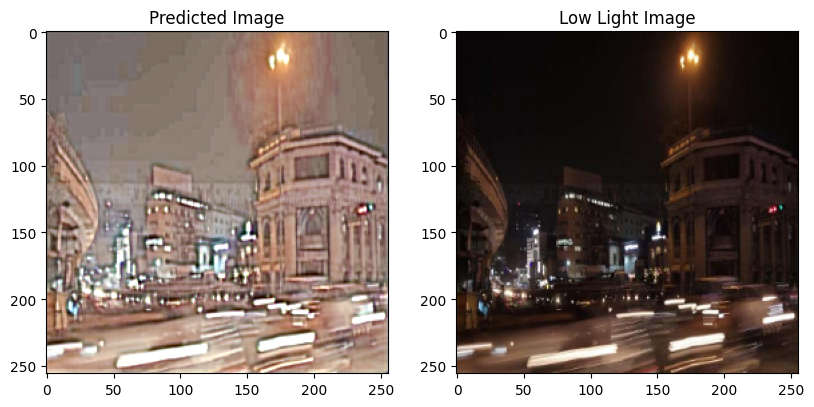

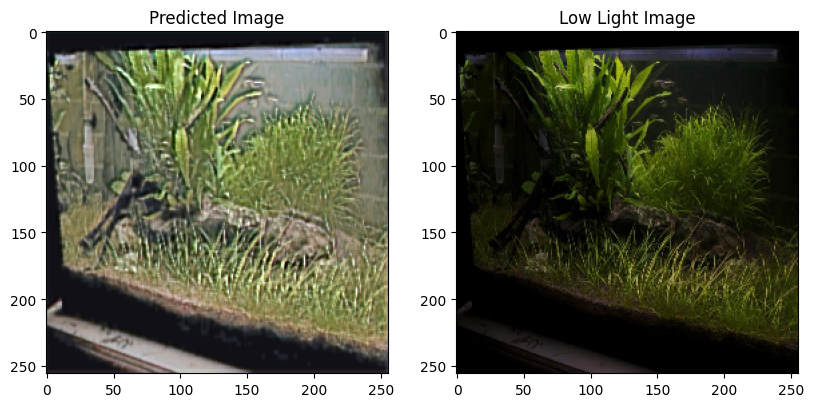

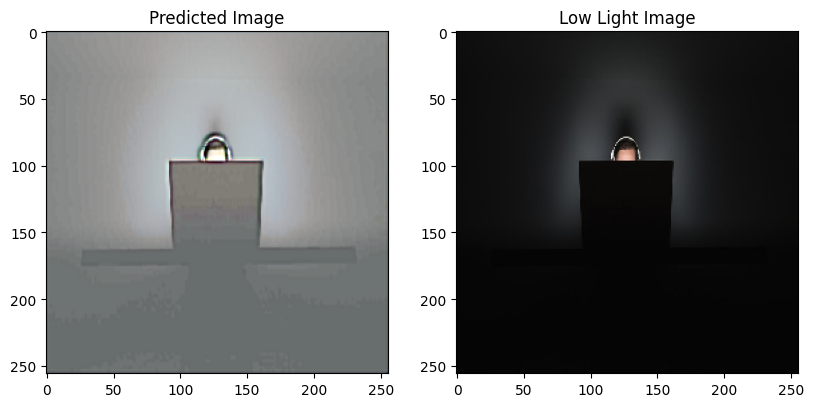

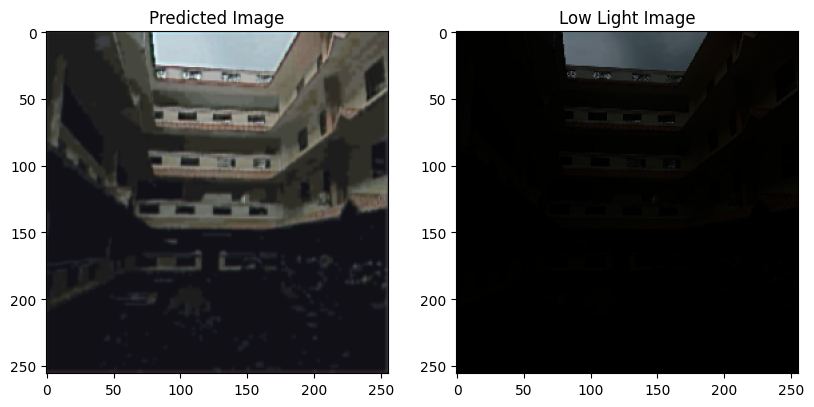

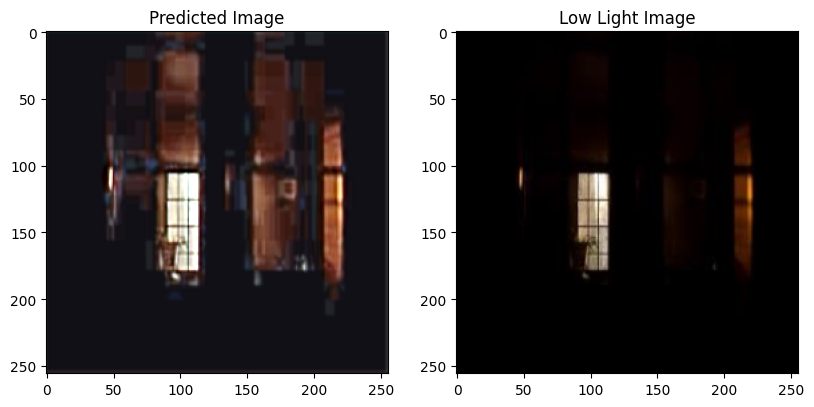

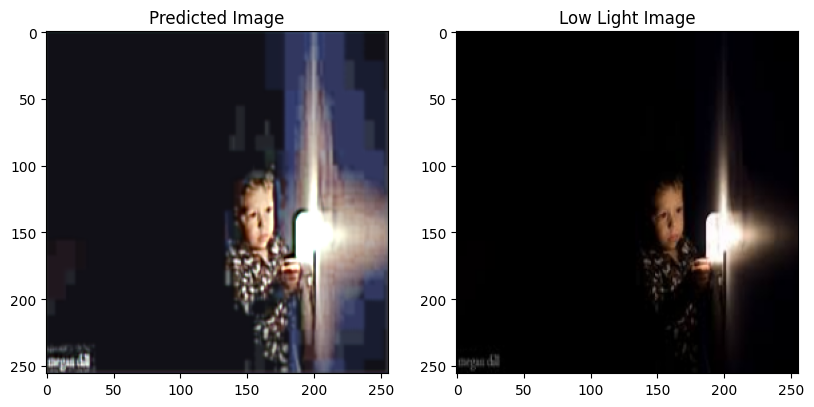

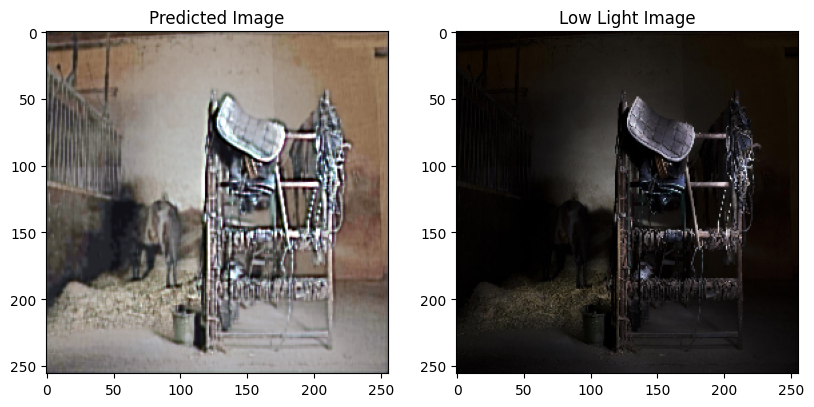

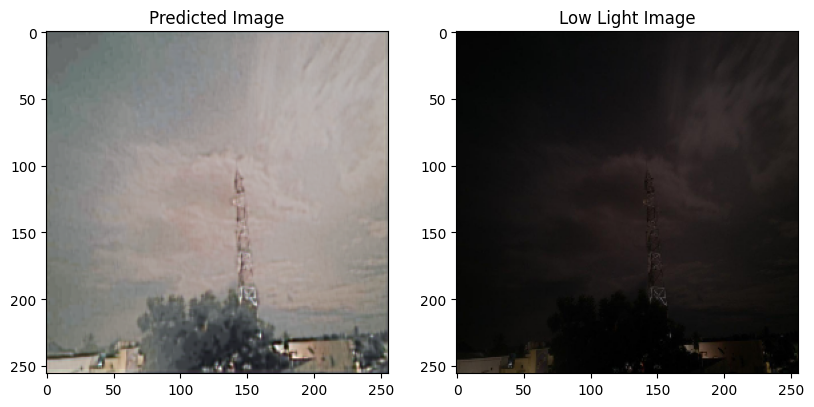

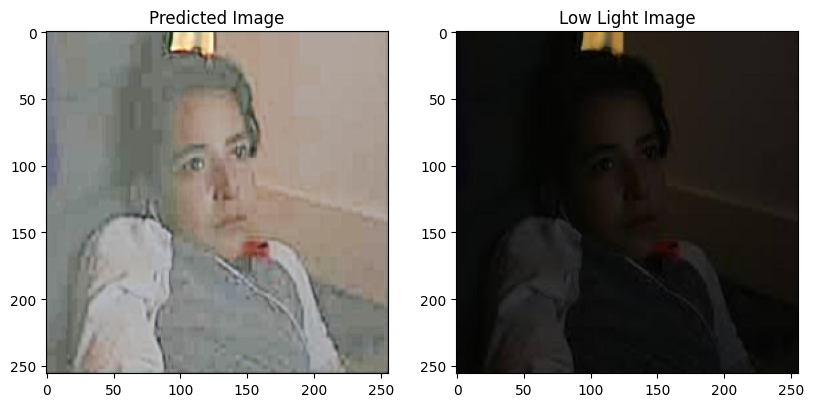

In [363]:
for i in range(0, len(test_low)):

    plt.figure(figsize=(15, 15))
    
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(predictions[i], cv2.COLOR_BGR2RGB))
    plt.title("Predicted Image")

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(low_light_images_resized[i], cv2.COLOR_BGR2RGB))
    plt.title("Low Light Image")
    